https://rebound.readthedocs.io/en/latest/ipython_examples/Churyumov-Gerasimenko/

In [45]:
import rebound
#To run an N-body simulation, we need to create a simulation object first:
sim = rebound.Simulation()

In [46]:
sim.add(m=1.)                # Central object
sim.add(m=1e-3, a=1., e=0.1) # Jupiter mass planet 
sim.add(a=1.4, e=0.1)        # Massless test particle

In [47]:
sim.integrate(100.)

In [48]:
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.calculate_orbits(): 
    print(o)


0.0001379031111733169 0.11100285684422287 0.0
0.7620968888266642 -0.3934338982350228 0.0
-1.5948501191422428 0.20487096187200812 0.0
<rebound.Orbit instance, a=0.9999999999999998 e=0.10000000000000006 inc=0.0 Omega=0.0 omega=0.0 f=5.698402270529936>
<rebound.Orbit instance, a=1.4174273398342736 e=0.12988282793113465 inc=0.0 Omega=0.0 omega=0.09938842199489617 f=2.9831333920230048>


In [49]:
import rebound
import matplotlib

In [50]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


In [51]:
for orbit in sim.calculate_orbits():
    print(orbit)

<rebound.Orbit instance, a=5.202647808145988 e=0.04836694905957328 inc=0.022751610075358506 Omega=1.7543660364449516 omega=4.772590466002875 f=6.121612864669904>
<rebound.Orbit instance, a=9.544319306682457 e=0.0548264896576056 inc=0.04341730453651614 Omega=1.9826812526560569 omega=5.905058474695599 f=4.039723523637163>


In [52]:
sim.add("Churyumov-Gerasimenko")

Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


In [53]:
#sim.add("NAME=Churyumov-Gerasimenko; CAP")

In [54]:
#sim.add("501")

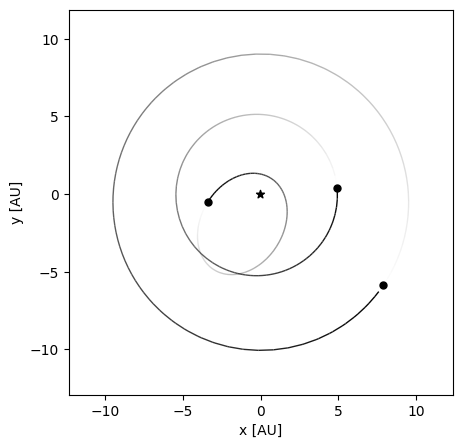

In [55]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, unitlabel="[AU]")

In [56]:
#https://arxiv.org/abs/1409.4779

In [136]:
#. Since we didn't specify a value for 
# REBOUND assumes that G = 1 The unit of length is one astronomical unit, the unit of time is one year/2π
import rebound
import matplotlib

In [137]:
sim = rebound.Simulation()
#print("G = {0}.".format(sim.G))
#sim.G = 6.674e-11
sim.units = ('yr', 'AU', 'Msun')
#sim.units = ('s', 'm', 'Kg')
print("G = {0}.".format(sim.G))
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Churyumov-Gerasimenko")

G = 39.476926421373.
Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Churyumov-Gerasimenko'... 
Found: 67P/Churyumov-Gerasimenko (chosen from query 'Churyumov-Gerasimenko')


In [138]:
sim.dt = -0.01
import numpy as np
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((4,Noutputs))
y = np.zeros((4,Noutputs))
z = np.zeros((4,Noutputs))

In [139]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

In [140]:
for i,time in enumerate(times):
    sim.integrate(time)
    #sim.status()
    x[0][i] = ps[0].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z
    x[3][i] = ps[3].x
    y[3][i] = ps[3].y
    z[3][i] = ps[3].z    

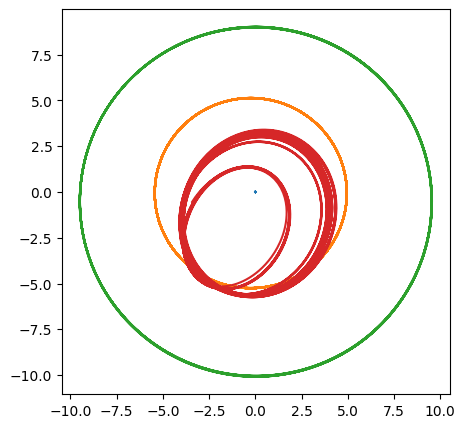

In [141]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
#ax.set_xlim([-10,10])
#ax.set_ylim([-10,10])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);
plt.plot(x[2], y[2]);
plt.plot(x[3], y[3]);

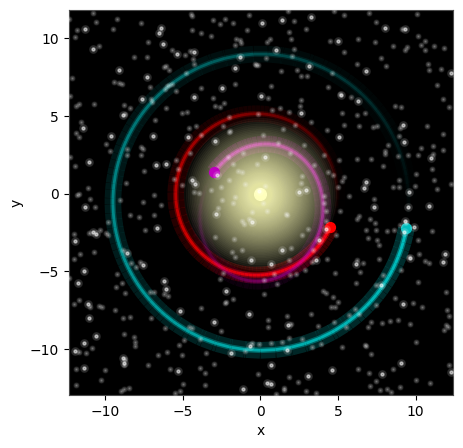

In [142]:
fig, ax = rebound.OrbitPlot(sim, fancy=True, color=True, lw=2)

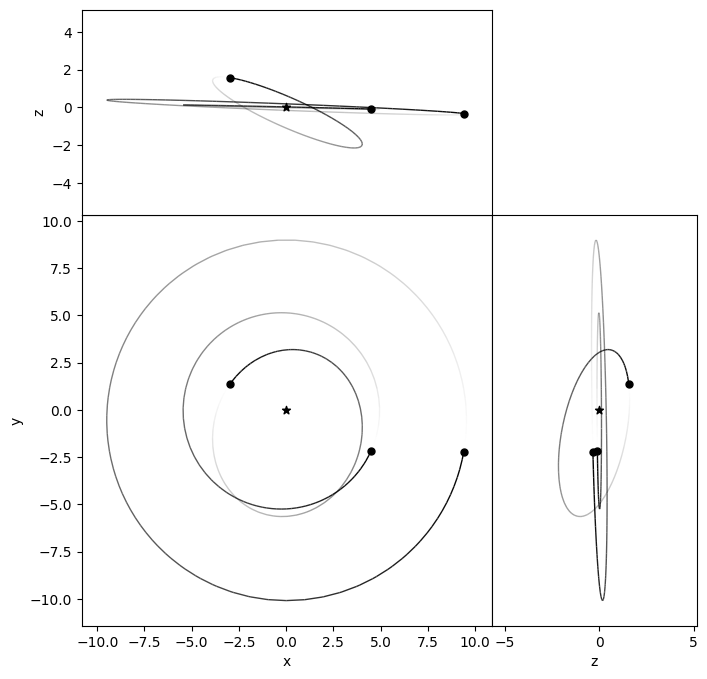

In [144]:
fig = rebound.OrbitPlot(sim,slices=0.5,xlim=[-2.,2],ylim=[-2.,2])

In [149]:
import rebound
import ipywidgets as widgets

sim = rebound.Simulation()
sim.getWidget()
sim.add(m=1) # add a star
for i in range(10):
    sim.add(m=1e-3,a=0.4+0.1*i,inc=0.03*i,omega=5.*i) # Jupiter mass planets on close orbits
sim.move_to_com() # Move to the centre of mass frame
sim.integrate(500)

In [150]:
sim.getWidget(size=(400,200),orbits=False)

Widget(N=11, count=2, height=200.0, orientation=(0.0, 0.0, 0.0, 1.0), overlay='REBOUND (ias15), N=11, t=500', …

In [151]:
widget_1 = sim.getWidget(orientation=(0,0,0,1),scale=2)
widget_2 = sim.getWidget(orientation=(0,1,0,1),scale=2,size=(50,200))
widget_3 = sim.getWidget(orientation=(1,0,0,1),scale=2,size=(200,50))
from ipywidgets import HBox, VBox
VBox((widget_3,HBox((widget_1, widget_2))))

In [152]:
sim.integrate(800)

In [153]:
import rebound
sim = rebound.Simulation()
sim.add(m=1) # add a star
for i in range(10):
    sim.add(m=1e-3,a=0.4+0.1*i,inc=0.03*i,omega=5.*i) # Jupiter mass planets on close orbits
sim.move_to_com() # Move to the centre of mass frame

w = sim.getWidget()
w

Widget(N=11, count=2, height=200.0, orbit_data=b'\x19\xfdo9\xc6\xc6C\xba\x9c`\xa0\xb9\xcd\xcc\xcc>\x00\x00\x00…

In [154]:
w.takeScreenshot()

In [155]:
times = [0,10,100]
w.takeScreenshot(times)